In [1]:
import pandas as pd
import json
import os 
import requests
import csv 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from scipy.stats import norm


In [2]:
df_voter=pd.read_csv('voter_data.csv')
df_uniq=pd.read_csv('unique_voters.csv')
df_token=pd.read_csv('token_data.csv')
df_delegates=pd.read_csv('delegates.csv')
df_proposal=pd.read_csv('proposal_data.csv')
df_proposal=pd.read_csv('proposal_data.csv')

token_len=len(df_token)
voter_len=len(df_voter)
delegates_len=len(df_delegates)
proposal_len=len(df_proposal)
uniq_len=len(df_uniq)

df_voter['weight']=df_voter['weight'].astype(float)



C:\Users\skpat\AppData\Local\Temp\ipykernel_24612\1334055100.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_token=pd.read_csv('token_data.csv')


Identify the top voters based on their voting weight.

In [13]:

# Read the voter_data table from CSV or database
voter_data_df = pd.read_csv("voter_data.csv",encoding='utf-8')  # Replace "voter_data.csv" with the actual file path


# Group the data by voter address and calculate the total weight for each voter
voter_data_df['weight'] = voter_data_df['weight'].astype(float) / 10**18
# voter_data_df['weight']=voter_data_df['weight'] / 10**25
voter_weight = voter_data_df.groupby(['voter.address','voter.name'])['weight'].sum().reset_index()

# Sort the data based on the total weight in descending order to identify the top voters
top_voters = voter_weight.sort_values(by='weight', ascending=False)

# Display the top voters
print("Top Voters based on Voting Weight:")
top_voters.head(10)  # Displaying the top 10 voters, adjust as needed


Top Voters based on Voting Weight:


voter.address           voter.name  \
1447   0x0eb5b03c0303f2f47cd81d7be4275af8ed347576             Treasure   
23885  0xf4b0556b9b6f53e00a1fdd2b0478ce841991d8fa          olimpio.eth   
2745   0x1b686ee8e31c5959d9f5bbd8122a58682788eead             L2BEAT 💗   
12832  0x839395e20bbb182fa440d08f850e6c7a8f6f0780     Griff Green 🙏🌱🎗💜   
18318  0xbbe98d590d7eb99f4a236587f2441826396053d3            PlutusDAO   
17730  0xb5b069370ef24bc67f114e185d185063ce3479f8              Frisson   
4633   0x2ef27b114917dd53f8633440a7c0328fef132e2f         MUX Protocol   
16174  0xa5df0cf3f95c6cd97d998b9d990a86864095d9b0  Blockworks Research   
2509   0x190473b3071946df65306989972706a4c006a561         ChainLinkGod   
20620  0xd333bc5c9670c9ceb18f9a2cf02c6e86807a8227              MaxLomu   

             weight  
1447   4.799599e+08  
23885  3.977026e+08  
2745   3.075374e+08  
12832  2.163766e+08  
18318  2.026802e+08  
17730  1.714908e+08  
4633   1.536926e+08  
16174  1.406700e+08  
2509   1.151511e+08  
20620  7.645340e+07

In [1]:

# Read the CSV data into
# Extract the 'weight' column
df=df_voter
weights = df['weight']

# Plot a histogram of the weights
plt.figure(figsize=(10, 6))
sns.histplot(weights, kde=False, bins=30, color='skyblue')
plt.title('Distribution of Voting Power (Weight)')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


NameError: name 'df_voter' is not defined

Ghost delegators(those who are the delegates but haven't participated in the voting process)

In [3]:
import pandas as pd

# Step 1: Read the CSV files into pandas DataFrames
df_delegates = pd.read_csv("delegates.csv")
df_voter = pd.read_csv("unique_voters.csv")

# Identify delegators data not present in voter data
delegators_not_in_voter = df_delegates[~df_delegates['account.address'].isin(df_voter['voter.address'])]

merged_df = pd.merge(df_delegates, df_voter, right_on=['voter.address'], left_on=['account.address'], how='inner')


delegators_not_in_voter.to_csv("ghost_delegates.csv",index=False)
# Display delegators data not present in voter data
print("Delegators data not present in voter data:")
delegators_not_in_voter




Delegators data not present in voter data:


account.address                 used_power  \
21      0x683a4f9915d6216f73d6df50151725036bd26c02  9062337181976681752389936   
34      0x60201046ed5b6c660984b82a19205b573f5fc805   789672481301375469301820   
48      0x067b9bbbbc42d2ab9b9ab6bb62646daf7f344a76  1431379009272936814908259   
59      0xb9b8ef61b7851276b0239757a039d54a23804cbb   336713083392637590244620   
64      0xffcdce3102ec97ec4032b2f162754b1e0d133acc   460735206395330194659275   
...                                            ...                        ...   
158731  0x3742baa4fa63b403019553995a1460ac1c3f2fa8                          0   
158734  0xf23e03c317aae2b78339f8613f4b003decdff4ba     9801747203311721732097   
158735  0x0474190569c7cadeceab3892a38b4d373903036a                          0   
158736  0x89b1d2997b2f60a061fafd712515f68dec2979d9       14999999999999999999   
158737  0x74e8dcde3c9194d3be02c384e6b08a392ed70638     1129204878448712664611   

                   delegated_power                 votesCount  delegatorsCount  
21      13125775229355527457993239  4063438047378845705603303             1634  
34       1036644778741417317080198   246972297440041847778378             1221  
48       1741857026822815846024254   310478017549879031115995              885  
59        465301375582056000557018   128588292189418410312398              632  
64        583811310066230879045179   123076103670900684385904              574  
...                            ...                        ...              ...  
158731                           1                          1                1  
158734      9801747203311721732098                          1                1  
158735                           1                          1                1  
158736        15000000000000000000                          1                1  
158737      1129204878448712664612                          1                1  

[74674 rows x 5 columns]

voter with and without tokens

In [8]:
import pandas as pd

# Read the voter_data table from CSV
table_1 = pd.read_csv("unique_voters.csv")

# Read the delegates table from CSV
table_2= pd.read_csv("token_data.csv")

# Merge the two tables based on account.id and voter.address
merged_df = pd.merge(table_1, table_2, right_on=['token.address'], left_on=['voter.address'], how='inner')

# Drop the extra 'account.id' column
merged_df.drop(columns=['token.address'], inplace=True)

data_file = "merged_datas/" + "token_voter_data.csv"  
print("number of voters having the tokens\t",len(merged_df))

print("voters without tokens\t\t\t",len(table_1)-len(merged_df))
print("total voters\t\t\t\t",len(table_1))



# Save the merged DataFrame back to CSV
merged_df.to_csv(data_file, index=False)


C:\Users\skpat\AppData\Local\Temp\ipykernel_23056\2254982192.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  table_2= pd.read_csv("token_data.csv")


number of voters having the tokens	 100549
voters without tokens			 34385
total voters				 134934


134934

percentage of token holders delegating there voting power to someone else 

In [24]:
print([token_len,uniq_len,delegates_len,proposal_len])

percent_of_nondelegating_tokenholders=100*(token_len-delegates_len)/token_len
print("around ",percent_of_nondelegating_tokenholders,"% of token holders are delegating their voting power to someone else")

[918033, 134934, 159179, 27]
around  82.66086295372824 % of token holders are delegating their voting power to someone else


Percent if real and ghost delegates

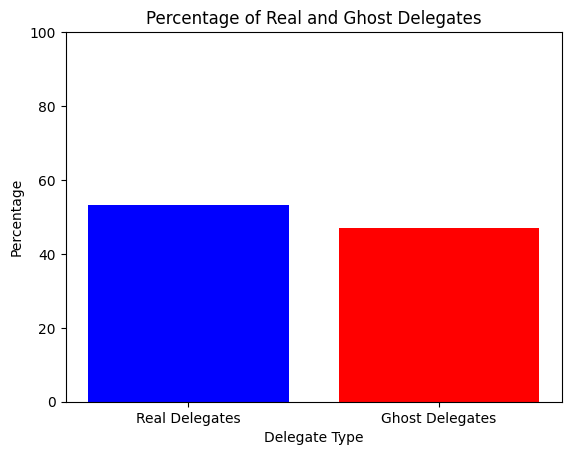

46.88809453508315

In [19]:

# Step 1: Read the real and ghost delegates data from CSV files
df_real_delegates = pd.read_csv("real_delegates.csv")
df_ghost_delegates = pd.read_csv("ghost_delegates.csv")

# Step 2: Calculate the percentage of real and ghost delegates
total_real_delegates = len(df_real_delegates)
total_ghost_delegates = len(df_ghost_delegates)

total_delegates = total_real_delegates + total_ghost_delegates

percent_real_delegates = (total_real_delegates / total_delegates) * 100
percent_ghost_delegates = (total_ghost_delegates / total_delegates) * 100

# Step 3: Plot the percentages using a bar graph
labels = ['Real Delegates', 'Ghost Delegates']
percentages = [percent_real_delegates, percent_ghost_delegates]

plt.bar(labels, percentages, color=['blue', 'red'])
plt.xlabel('Delegate Type')
plt.ylabel('Percentage')
plt.title('Percentage of Real and Ghost Delegates')
plt.ylim(0, 100)
plt.show()
percent_ghost_delegates


Top voters who are having 90% impact on overall voting.

In [13]:
import pandas as pd

# Step 1: Read the CSV file
voter_data = pd.read_csv('unique_voter_delegate.csv')

# Step 2: Calculate the total weight of all votes in the proposal
total_weight = voter_data['votesCount'].sum()

# Step 3: Sort the voters based on their contribution in descending order
sorted_voters = voter_data.groupby(['voter.address', 'voter.ens', 'voter.name'])['votesCount'].sum().sort_values(ascending=False)

# Step 4: Iterate through the sorted list to find the top voters contributing over 90% of the total weight
cumulative_weight = 0
top_voters = []
for voter, weight in sorted_voters.items():
    cumulative_weight += weight
    if cumulative_weight / total_weight > 0.5:
        top_voters.append((voter[0], voter[1], voter[2], weight))
        break
    top_voters.append((voter[0], voter[1], voter[2], weight))

# Print the top voters contributing over 90% of the total weight
print("Top Voters Contributing Over 80% of Total Voting Power:")
top_voters_df = pd.DataFrame(top_voters, columns=['Voter Address', 'Voter ENS', 'Voter Name', 'Weight'])
top_voters_df


KeyError: 'voter.ens'

tally voters participation

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from CSV
df_delegates = pd.read_csv("delegates.csv")

# Calculate the total number of delegations
total_delegations = df_delegates['delegatorsCount'].sum()

# Calculate the percentage of delegations represented by each delegate
df_delegates['percentage_of_delegations'] = (df_delegates['delegatorsCount'] / total_delegations) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(df_delegates['percentage_of_delegations'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Delegations Represented by Each Delegate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


KeyboardInterrupt: 

voters without recieved delegations

In [21]:
import pandas as pd

# Step 1: Read the CSV files into pandas DataFrames
df_voter = pd.read_csv("unique_voters.csv")
df_delegates = pd.read_csv("real_delegates.csv")

# Identify voters data not present in real delegates data
voters_not_real_delegates = df_voter[~df_voter['voter.address'].isin(df_delegates['voter.address'])]

# Save the voters who are not real delegates to a CSV file
voters_not_real_delegates.to_csv("voters_not_real_delegates.csv", index=False)

# Display voters who are not real delegates
print("Voters who are not real delegates:")
print(voters_not_real_delegates)


Voters who are not real delegates:
                                     voter.address  Total Proposals  \
47      0x5f5ec4f83accc5ba176064dbfa67d6ac74c03af2                1   
97      0xdc08a78279404d3614c55dd1945a029b8cb8fc8f               11   
114     0x1f99b2df41969c0b88517b55bf0426dd2ecf977c               12   
121     0xcae79fab5257eeb32a4c744210914feca536f435                8   
126     0x578ddbd61a848ef4cd1be71d96ddd70e58fb16ef                4   
...                                            ...              ...   
134928  0x0614b2d74c3d067c9e914db65f0ec783d4bef1fa                7   
134929  0x26cb836e81bfc47c2530adbf63968c9830a44c8d                4   
134930  0xcfa5ef91d50811f171b9ba8a0ba0c760a2546755                1   
134931  0x06103b5b8fa6abef05194cfc45eaeae96b278436                3   
134932  0x26d9eeb9da0cceba8d655ce7836d2e8ac83e07f2                1   

        Total Votes  Total FOR Votes  Total AGAINST Votes  Total Weight  \
47                1                1 

Voting Patterns

C:\Users\skpat\AppData\Local\Temp\ipykernel_16364\1208039671.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['timestamp'].dt.to_period('M')


<Figure size 1000x600 with 0 Axes>

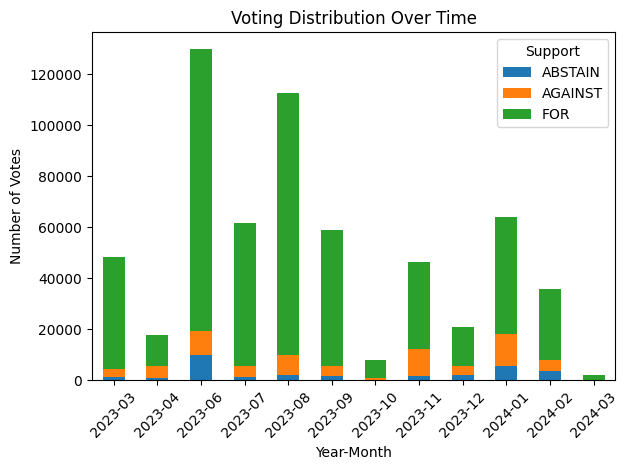

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV file
df = pd.read_csv("voter_data.csv")

# Convert timestamp column to datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract year and month from timestamp
df['year_month'] = df['timestamp'].dt.to_period('M')

# Group by year_month and support, then count the number of votes
voting_distribution = df.groupby(['year_month', 'support']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
voting_distribution.plot(kind='bar', stacked=True)
plt.title('Voting Distribution Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45)
plt.legend(title='Support')
plt.tight_layout()
plt.show()


Voter Influence

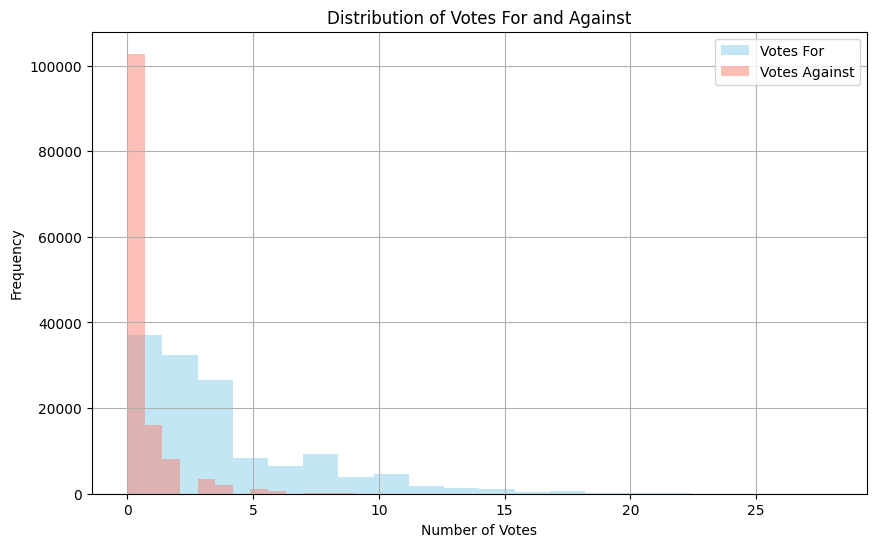

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data from the CSV file
data = pd.read_csv("unique_voters.csv")

# Step 2: Visualize the distribution of voting behavior in one graph
plt.figure(figsize=(10, 6))

# Plot histogram for For Votes
plt.hist(data['for_votes'], bins=20, color='skyblue', alpha=0.5, label='Votes For')

# Plot histogram for Against Votes
plt.hist(data['against_votes'], bins=20, color='salmon', alpha=0.5, label='Votes Against')

plt.title('Distribution of Votes For and Against')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


Weight Distribution

In [6]:
import pandas as pd

# Load the voting data from CSV file
voter_data = pd.read_csv("unique_voters.csv")
voter_data['weight']=voter_data['weight'].astype(float)
# Function to calculate success rate for a specific voter

def calculate_success_rate_for_voter(voter_address):
    # Filter the dataset to include only the votes cast by the specific voter
    voter_votes = voter_data[voter_data['voter.address'] == voter_address]
    
    # Calculate the total number of votes cast by the voter for and against all proposals
    total_votes_for = voter_votes[voter_votes['support'] == 'FOR']['weight'].sum()
    total_votes_against = voter_votes[voter_votes['support'] == 'AGAINST']['weight'].sum()
    
    # Calculate the success rate for the voter
    if total_votes_for + total_votes_against > 0:
        success_rate = total_votes_for / (total_votes_for + total_votes_against)
    else:
        success_rate = 0  # Set success rate to 0 if the voter hasn't voted on any proposals
    
    return success_rate

# Add a new column for success rate to the dataset
voter_data['success_rate'] = voter_data['voter.address'].apply(calculate_success_rate_for_voter)
voter_data.to_csv("data.csv")
# Display the dataset with the added success rate column
print(voter_data)


KeyError: 'support'

on-chain governance participation rate

In [8]:
df_voter['weight']=df_voter['weight'].astype(float)
df_voter.to_csv("voter_data.csv",index=False)
voted_power=df_voter['weight'].sum()
voted_power

delegated_power=df_delegates['votesCount'].sum()
print(delegated_power,voted_power)


NameError: name 'df_voter' is not defined

Most frequent voters


In [24]:
import pandas as pd

# Read the data from the CSV file
data = pd.read_csv('voter_Data.csv')

# Group the data by voter's address and count the unique proposals each voter has voted for
voter_counts = data.groupby('voter.address')['proposal_id'].nunique()
voter_all=data.groupby('voter.address')[['voter.address', 'voter.name', 'voter.ens']]
# Filter the data to include only voters who voted in all 28 proposals
voters_all_proposals = voter_counts[voter_counts >= 28]

# Merge the original data with the voter names and ENS addresses
voters_all_proposals_data = pd.merge(voters_all_proposals, voter_all, on='voter.address', how='left')

# Display the list of voters who voted in all 28 proposals along with their names and ENS addresses
print("List of voters who voted in all 28 proposals:")
voters_all_proposals_data


TypeError: Can only merge Series or DataFrame objects, a <class 'pandas.core.groupby.generic.DataFrameGroupBy'> was passed